# Topology Optimization

Import all the libraries and the code.

In [1]:
#from __future__ import division
import sys

### Imports for calculations
import numpy as np
from numpy.lib import scimath
import math

### Import for solver
import scipy
from scipy.sparse import diags # or use numpy: from numpy import diag as diags
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import spsolve

### Imports for plots
from matplotlib import colors
import matplotlib.pyplot as plt

import Topology_optimization

Try the code by changing the number of elements in x and in y, the volume fraction, the method and the beam.

A maximum of iterations was added due to the long computational time.



Topology_optimization.main( nelx, nely, volfrac, settings, BC)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


Start iteration
it.: 1 , obj.: 3368.780 Vol.: 0.175, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 498.965 Vol.: 0.260, kktnorm.: 73.109  ch.: 0.071
it.: 3 , obj.: 240.138 Vol.: 0.315, kktnorm.: 44.656  ch.: 0.060
it.: 4 , obj.: 195.298 Vol.: 0.342, kktnorm.: 27.739  ch.: 0.062
it.: 5 , obj.: 138.662 Vol.: 0.368, kktnorm.: 33.497  ch.: 0.053
it.: 6 , obj.: 121.890 Vol.: 0.390, kktnorm.: 11.740  ch.: 0.039
it.: 7 , obj.: 116.428 Vol.: 0.388, kktnorm.: 8.226  ch.: 0.048
it.: 8 , obj.: 108.325 Vol.: 0.395, kktnorm.: 7.172  ch.: 0.031
it.: 9 , obj.: 104.909 Vol.: 0.398, kktnorm.: 4.217  ch.: 0.023
it.: 10 , obj.: 102.585 Vol.: 0.399, kktnorm.: 4.628  ch.: 0.022
it.: 11 , obj.: 100.559 Vol.: 0.398, kktnorm.: 4.097  ch.: 0.022
it.: 12 , obj.: 98.993 Vol.: 0.399, kktnorm.: 2.576  ch.: 0.023
it.: 13 , obj.: 97.848 Vol.: 0.399, kktnorm.: 2.809  ch.: 0.043
it.: 14 , obj.: 96.881 Vol.: 0.400, kktnorm.: 1.506  ch.: 0.036
it.: 15 , obj.: 96.108 Vol.: 0.400, kktnorm.: 1.934  ch.: 0.047
it.: 16 , obj.:

it.: 129 , obj.: 85.101 Vol.: 0.400, kktnorm.: 0.760  ch.: 0.062
it.: 130 , obj.: 84.979 Vol.: 0.400, kktnorm.: 0.516  ch.: 0.031
it.: 131 , obj.: 85.034 Vol.: 0.400, kktnorm.: 0.498  ch.: 0.008
it.: 132 , obj.: 85.011 Vol.: 0.400, kktnorm.: 0.345  ch.: 0.019
it.: 133 , obj.: 84.967 Vol.: 0.401, kktnorm.: 0.409  ch.: 0.072
it.: 134 , obj.: 85.138 Vol.: 0.400, kktnorm.: 0.479  ch.: 0.007
it.: 135 , obj.: 85.107 Vol.: 0.400, kktnorm.: 0.406  ch.: 0.009
it.: 136 , obj.: 85.075 Vol.: 0.400, kktnorm.: 0.519  ch.: 0.011
it.: 137 , obj.: 84.992 Vol.: 0.400, kktnorm.: 0.491  ch.: 0.015
it.: 138 , obj.: 84.992 Vol.: 0.400, kktnorm.: 0.258  ch.: 0.010
it.: 139 , obj.: 84.953 Vol.: 0.400, kktnorm.: 0.456  ch.: 0.015
it.: 140 , obj.: 84.927 Vol.: 0.400, kktnorm.: 0.431  ch.: 0.008
it.: 141 , obj.: 84.931 Vol.: 0.400, kktnorm.: 0.540  ch.: 0.030
it.: 142 , obj.: 84.904 Vol.: 0.400, kktnorm.: 1.504  ch.: 0.047
it.: 143 , obj.: 84.827 Vol.: 0.400, kktnorm.: 1.063  ch.: 0.016
it.: 144 , obj.: 84.789 V

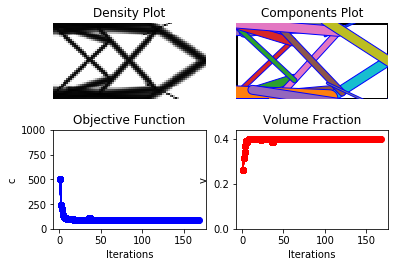

In [3]:
nelx = 80
nely = 40
volume_fraction = 0.4
method = 'GGP'        # 'GGP'   'MMC'
BC = 'Short_Cantiliever'       # 'MBB'   'Short_Cantiliever'   'L-Shape'   'Top_Rib'
max_iterations = 500

it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(nelx,nely,volume_fraction,method,BC,max_iterations)

Density plot

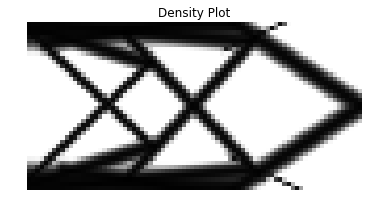

Plot Saved


In [5]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(nelx, nely).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

Components plot

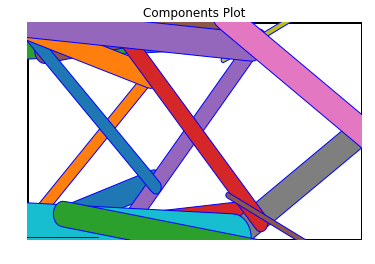

Plot Saved


In [6]:
fig=plt.figure()
plt.title('Components Plot')
plt.fill([0,nelx,nelx,0],[0,0,nely,nely],"w",edgecolor='black', linewidth=3)
plt.fill(xn,yn,Mc,"b",edgecolor='blue', linewidth=1)
if BC == 'L-shape':
    plt.fill([(nelx)/2,nelx,nelx,(nelx)/2],[(nely)/2,(nely)/2,nely,nely],"w",edgecolor='black', linewidth=3)
plt.axis([0,nelx,0,nely])
plt.axis('off')
plt.show()
fig.savefig('Component plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

Check the graph of the objective function

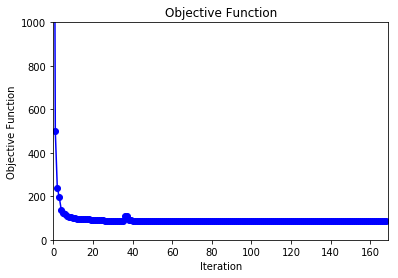

Plot Saved


In [7]:
fig=plt.figure()
plt.title('Objective Function')
x_plot = np.arange(0,it)
plt.plot(x_plot,c[x_plot],'b', marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function')
plt.axis([0,it,0,1000])
plt.show()
fig.savefig('Objective Function ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

Check the graph of the volume fraction

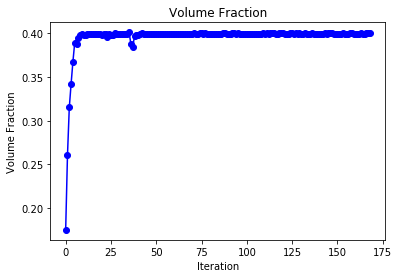

Plot Saved


In [8]:
fig=plt.figure()
plt.title('Volume Fraction')
x_plot = np.arange(0,it)
plt.plot(x_plot,v[x_plot],'b', marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Volume Fraction')
plt.show()
fig.savefig('Volume Fraction ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

kktnorm plot

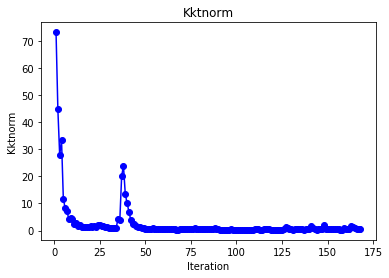

Plot Saved


In [9]:
fig=plt.figure()
plt.title('Kktnorm')
x_plot = np.arange(1,it)
plt.plot(x_plot,kktnorm[x_plot],'b', marker = 'o')
plt.xlabel('Iteration')
plt.ylabel('Kktnorm')
plt.show()
fig.savefig('Kktnorm ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

###  Diferent Types of Test Beams

Different types of beams: MBB, Short Cantiliever, L-Shape and Top_Rib

First let's see the MBB

Start iteration
it.: 1 , obj.: 12985.612 Vol.: 0.175, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 2099.213 Vol.: 0.261, kktnorm.: 86.896  ch.: 0.070
it.: 3 , obj.: 1390.162 Vol.: 0.309, kktnorm.: 55.422  ch.: 0.059
it.: 4 , obj.: 563.554 Vol.: 0.335, kktnorm.: 50.269  ch.: 0.057
it.: 5 , obj.: 346.672 Vol.: 0.350, kktnorm.: 32.207  ch.: 0.053
it.: 6 , obj.: 275.333 Vol.: 0.358, kktnorm.: 45.969  ch.: 0.058
it.: 7 , obj.: 210.768 Vol.: 0.362, kktnorm.: 52.014  ch.: 0.045
it.: 8 , obj.: 192.007 Vol.: 0.376, kktnorm.: 12.549  ch.: 0.053
it.: 9 , obj.: 169.342 Vol.: 0.390, kktnorm.: 15.307  ch.: 0.032
it.: 10 , obj.: 159.477 Vol.: 0.395, kktnorm.: 6.993  ch.: 0.026
it.: 11 , obj.: 152.234 Vol.: 0.396, kktnorm.: 6.872  ch.: 0.018
it.: 12 , obj.: 146.048 Vol.: 0.397, kktnorm.: 5.434  ch.: 0.026
it.: 13 , obj.: 142.039 Vol.: 0.397, kktnorm.: 4.865  ch.: 0.020
it.: 14 , obj.: 138.930 Vol.: 0.398, kktnorm.: 4.155  ch.: 0.019
it.: 15 , obj.: 136.672 Vol.: 0.399, kktnorm.: 3.733  ch.: 0.019
it.: 

it.: 127 , obj.: 106.673 Vol.: 0.400, kktnorm.: 0.759  ch.: 0.061
it.: 128 , obj.: 106.641 Vol.: 0.400, kktnorm.: 0.573  ch.: 0.006
it.: 129 , obj.: 106.613 Vol.: 0.400, kktnorm.: 0.724  ch.: 0.005
it.: 130 , obj.: 106.583 Vol.: 0.400, kktnorm.: 0.501  ch.: 0.006
it.: 131 , obj.: 106.558 Vol.: 0.400, kktnorm.: 0.799  ch.: 0.007
it.: 132 , obj.: 106.526 Vol.: 0.400, kktnorm.: 0.524  ch.: 0.006
it.: 133 , obj.: 106.508 Vol.: 0.400, kktnorm.: 1.033  ch.: 0.011
it.: 134 , obj.: 106.469 Vol.: 0.400, kktnorm.: 0.565  ch.: 0.008
it.: 135 , obj.: 106.411 Vol.: 0.400, kktnorm.: 0.549  ch.: 0.027
it.: 136 , obj.: 106.422 Vol.: 0.400, kktnorm.: 0.637  ch.: 0.020
it.: 137 , obj.: 106.386 Vol.: 0.400, kktnorm.: 0.659  ch.: 0.010
it.: 138 , obj.: 106.316 Vol.: 0.400, kktnorm.: 0.715  ch.: 0.011
it.: 139 , obj.: 106.096 Vol.: 0.400, kktnorm.: 0.888  ch.: 0.041
it.: 140 , obj.: 105.516 Vol.: 0.400, kktnorm.: 1.786  ch.: 0.030
it.: 141 , obj.: 105.600 Vol.: 0.400, kktnorm.: 3.138  ch.: 0.020
it.: 142 ,

it.: 252 , obj.: 102.080 Vol.: 0.400, kktnorm.: 0.206  ch.: 0.004
it.: 253 , obj.: 102.071 Vol.: 0.400, kktnorm.: 0.186  ch.: 0.005
it.: 254 , obj.: 102.063 Vol.: 0.400, kktnorm.: 0.220  ch.: 0.005
it.: 255 , obj.: 102.058 Vol.: 0.400, kktnorm.: 0.308  ch.: 0.006
it.: 256 , obj.: 102.000 Vol.: 0.400, kktnorm.: 0.432  ch.: 0.028
it.: 257 , obj.: 102.018 Vol.: 0.400, kktnorm.: 0.267  ch.: 0.021
it.: 258 , obj.: 102.027 Vol.: 0.400, kktnorm.: 0.291  ch.: 0.008
it.: 259 , obj.: 102.028 Vol.: 0.400, kktnorm.: 0.191  ch.: 0.007
it.: 260 , obj.: 101.976 Vol.: 0.400, kktnorm.: 0.203  ch.: 0.036
it.: 261 , obj.: 102.020 Vol.: 0.400, kktnorm.: 0.215  ch.: 0.009
it.: 262 , obj.: 102.021 Vol.: 0.400, kktnorm.: 0.222  ch.: 0.017
it.: 263 , obj.: 102.013 Vol.: 0.400, kktnorm.: 0.218  ch.: 0.006
it.: 264 , obj.: 102.007 Vol.: 0.400, kktnorm.: 0.220  ch.: 0.004
it.: 265 , obj.: 102.002 Vol.: 0.400, kktnorm.: 0.221  ch.: 0.004
it.: 266 , obj.: 101.996 Vol.: 0.400, kktnorm.: 0.219  ch.: 0.005
it.: 267 ,

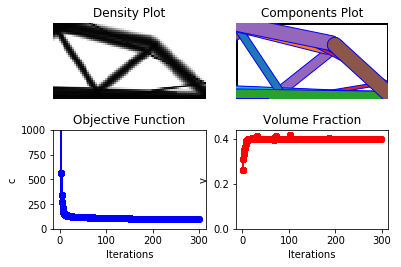

In [10]:
#'MBB'
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(nelx,nely,volume_fraction,method,'MBB',max_iterations)

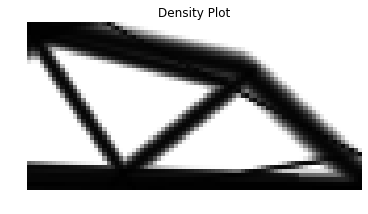

Plot Saved


In [11]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(nelx, nely).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - MBB - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

Short Cantiliever

Start iteration
it.: 1 , obj.: 3368.780 Vol.: 0.175, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 498.965 Vol.: 0.260, kktnorm.: 73.109  ch.: 0.071
it.: 3 , obj.: 240.138 Vol.: 0.315, kktnorm.: 44.656  ch.: 0.060
it.: 4 , obj.: 195.298 Vol.: 0.342, kktnorm.: 27.739  ch.: 0.062
it.: 5 , obj.: 138.662 Vol.: 0.368, kktnorm.: 33.497  ch.: 0.053
it.: 6 , obj.: 121.890 Vol.: 0.390, kktnorm.: 11.740  ch.: 0.039
it.: 7 , obj.: 116.428 Vol.: 0.388, kktnorm.: 8.226  ch.: 0.048
it.: 8 , obj.: 108.325 Vol.: 0.395, kktnorm.: 7.172  ch.: 0.031
it.: 9 , obj.: 104.909 Vol.: 0.398, kktnorm.: 4.217  ch.: 0.023
it.: 10 , obj.: 102.585 Vol.: 0.399, kktnorm.: 4.628  ch.: 0.022
it.: 11 , obj.: 100.559 Vol.: 0.398, kktnorm.: 4.097  ch.: 0.022
it.: 12 , obj.: 98.993 Vol.: 0.399, kktnorm.: 2.576  ch.: 0.023
it.: 13 , obj.: 97.848 Vol.: 0.399, kktnorm.: 2.809  ch.: 0.043
it.: 14 , obj.: 96.881 Vol.: 0.400, kktnorm.: 1.506  ch.: 0.036
it.: 15 , obj.: 96.108 Vol.: 0.400, kktnorm.: 1.934  ch.: 0.047
it.: 16 , obj.:

it.: 129 , obj.: 85.101 Vol.: 0.400, kktnorm.: 0.760  ch.: 0.062
it.: 130 , obj.: 84.979 Vol.: 0.400, kktnorm.: 0.516  ch.: 0.031
it.: 131 , obj.: 85.034 Vol.: 0.400, kktnorm.: 0.498  ch.: 0.008
it.: 132 , obj.: 85.011 Vol.: 0.400, kktnorm.: 0.345  ch.: 0.019
it.: 133 , obj.: 84.967 Vol.: 0.401, kktnorm.: 0.409  ch.: 0.072
it.: 134 , obj.: 85.138 Vol.: 0.400, kktnorm.: 0.479  ch.: 0.007
it.: 135 , obj.: 85.107 Vol.: 0.400, kktnorm.: 0.406  ch.: 0.009
it.: 136 , obj.: 85.075 Vol.: 0.400, kktnorm.: 0.519  ch.: 0.011
it.: 137 , obj.: 84.992 Vol.: 0.400, kktnorm.: 0.491  ch.: 0.015
it.: 138 , obj.: 84.992 Vol.: 0.400, kktnorm.: 0.258  ch.: 0.010
it.: 139 , obj.: 84.953 Vol.: 0.400, kktnorm.: 0.456  ch.: 0.015
it.: 140 , obj.: 84.927 Vol.: 0.400, kktnorm.: 0.431  ch.: 0.008
it.: 141 , obj.: 84.931 Vol.: 0.400, kktnorm.: 0.540  ch.: 0.030
it.: 142 , obj.: 84.904 Vol.: 0.400, kktnorm.: 1.504  ch.: 0.047
it.: 143 , obj.: 84.827 Vol.: 0.400, kktnorm.: 1.063  ch.: 0.016
it.: 144 , obj.: 84.789 V

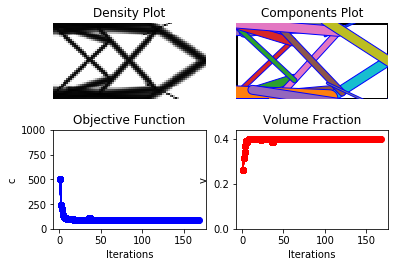

In [12]:
#'Short_Cantiliever'
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(nelx,nely,volume_fraction,method,'Short_Cantiliever',max_iterations)

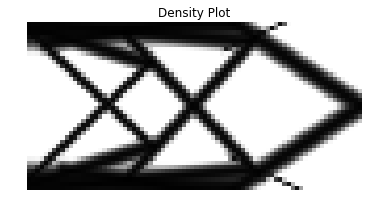

In [13]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(nelx, nely).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - Short_Cantiliever - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     

L-Shape

Start iteration


IndexError: index 6400 is out of bounds for axis 0 with size 1

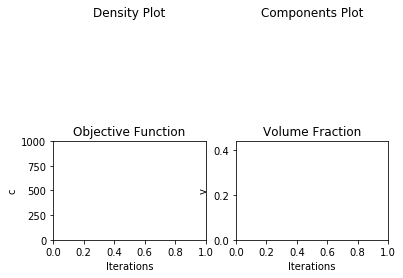

In [14]:
#'L-Shape'
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(80,160,volume_fraction,method,'L-Shape',max_iterations)

In [ ]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(80, 160).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - L-Shape - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

In [ ]:
#'Top_Rib'
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(160,40,volume_fraction,method,'Top_Rib',max_iterations)

In [ ]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(160, 40).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - Top_Rib - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

### Different Methods

Now let's try different approaches: GGP, MMC, MNA and GP 

First the Generalized Geometry Projection (GGP)

In [ ]:
# 'GGP'
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(nelx,nely,volume_fraction,'GGP',BC,max_iterations)

In [ ]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(nelx, nely).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - GPP - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )

Moving Morphable Components (MMC)

In [ ]:
#'MMC'
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(nelx,nely,volume_fraction,'MMC',BC,max_iterations)

In [ ]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(nelx, nely).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - MCC - ' + str(volume_fraction) + '.png')     

Moving Nodes Approach (MNA)

In [ ]:
#'MNA'
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(nelx,nely,volume_fraction,'MNA',BC,max_iterations)

In [ ]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(nelx, nely).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - MNA - ' + str(volume_fraction) + '.png')     

Geometry Projection (GP)

In [ ]:
#'GP'
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(nelx,nely,volume_fraction,'GP',BC,max_iterations)

In [ ]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(nelx, nely).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - GP - ' + str(volume_fraction) + '.png')     

### Extras Plots:

Different mesh sizes:

160 x 80

In [ ]:
max_iterations = 100

it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(160,80,0.5,method,BC,max_iterations)

In [ ]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(nelx, nely).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot 160 x 80 - ' + str(BC) + ' - ' + str(method) + ' - 0.5.png')     
print("Plot Saved" )

120 x 60

In [ ]:
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(120,60,0.5,method,BC,max_iterations)

In [ ]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(120, 60).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot 120 x 60 - ' + str(BC) + ' - ' + str(method) + ' - 0.5.png')     
print("Plot Saved" )

80 x 40

In [ ]:
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(80,40,0.5,method,BC,max_iterations)

In [ ]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(80, 40).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot 80 x 40 - ' + str(BC) + ' - ' + str(method) + ' - 0.5.png')     
print("Plot Saved" )

40 x 20

In [ ]:
it, c, v, x, xn, yn, Mc, kktnorm = Topology_optimization.main(40,20,0.5,method,BC,max_iterations)

In [ ]:
fig=plt.figure()
plt.title('Density Plot')
plt.imshow(-x.reshape(40, 20).T, cmap='gray', interpolation='none', norm=colors.Normalize(vmin=-1, vmax=0))
plt.axis('off')
plt.show()
fig.savefig('Density plot 40 x 20 - ' + str(BC) + ' - ' + str(method) + ' - 0.5.png')     
print("Plot Saved" )

Check the graphic of the objective function in terms of the volume fraction

it.: 1 , obj.: 33106.986 Vol.: 0.111, kktnorm.: 10.001  ch.: 1.000
it.: 2 , obj.: 3348.537 Vol.: 0.228, kktnorm.: 101.565  ch.: 0.079
it.: 3 , obj.: 1250.866 Vol.: 0.322, kktnorm.: 94.591  ch.: 0.071
it.: 4 , obj.: 378.363 Vol.: 0.402, kktnorm.: 65.983  ch.: 0.068
it.: 5 , obj.: 171.853 Vol.: 0.479, kktnorm.: 101.874  ch.: 0.063
it.: 6 , obj.: 130.620 Vol.: 0.544, kktnorm.: 37.810  ch.: 0.067
it.: 7 , obj.: 100.586 Vol.: 0.612, kktnorm.: 25.539  ch.: 0.060
it.: 8 , obj.: 82.386 Vol.: 0.673, kktnorm.: 15.498  ch.: 0.059
it.: 9 , obj.: 75.426 Vol.: 0.684, kktnorm.: 12.077  ch.: 0.049
it.: 10 , obj.: 72.808 Vol.: 0.696, kktnorm.: 4.478  ch.: 0.024
it.: 11 , obj.: 72.846 Vol.: 0.697, kktnorm.: 2.882  ch.: 0.045
it.: 12 , obj.: 71.526 Vol.: 0.697, kktnorm.: 3.947  ch.: 0.024
it.: 13 , obj.: 70.704 Vol.: 0.699, kktnorm.: 2.824  ch.: 0.021
it.: 14 , obj.: 70.221 Vol.: 0.699, kktnorm.: 1.897  ch.: 0.023
it.: 15 , obj.: 69.894 Vol.: 0.699, kktnorm.: 1.304  ch.: 0.024
it.: 16 , obj.: 69.622 Vol.

it.: 29 , obj.: 71.008 Vol.: 0.650, kktnorm.: 0.845  ch.: 0.054
it.: 30 , obj.: 70.873 Vol.: 0.649, kktnorm.: 0.818  ch.: 0.047
it.: 31 , obj.: 70.705 Vol.: 0.650, kktnorm.: 0.836  ch.: 0.038
it.: 32 , obj.: 70.551 Vol.: 0.650, kktnorm.: 0.755  ch.: 0.018
it.: 33 , obj.: 70.375 Vol.: 0.650, kktnorm.: 0.752  ch.: 0.019
it.: 34 , obj.: 70.072 Vol.: 0.651, kktnorm.: 0.667  ch.: 0.028
it.: 35 , obj.: 69.729 Vol.: 0.652, kktnorm.: 0.686  ch.: 0.037
it.: 36 , obj.: 69.750 Vol.: 0.650, kktnorm.: 0.723  ch.: 0.026
it.: 37 , obj.: 69.561 Vol.: 0.650, kktnorm.: 0.582  ch.: 0.024
it.: 38 , obj.: 69.411 Vol.: 0.650, kktnorm.: 0.566  ch.: 0.024
it.: 39 , obj.: 69.296 Vol.: 0.650, kktnorm.: 0.606  ch.: 0.018
it.: 40 , obj.: 69.221 Vol.: 0.650, kktnorm.: 0.572  ch.: 0.022
it.: 41 , obj.: 69.424 Vol.: 0.648, kktnorm.: 0.629  ch.: 0.043
it.: 42 , obj.: 69.027 Vol.: 0.650, kktnorm.: 0.916  ch.: 0.041
it.: 43 , obj.: 68.963 Vol.: 0.650, kktnorm.: 0.494  ch.: 0.037
it.: 44 , obj.: 68.864 Vol.: 0.650, kktn

it.: 57 , obj.: 72.966 Vol.: 0.600, kktnorm.: 0.524  ch.: 0.016
it.: 58 , obj.: 72.873 Vol.: 0.600, kktnorm.: 0.557  ch.: 0.011
it.: 59 , obj.: 72.744 Vol.: 0.600, kktnorm.: 0.557  ch.: 0.018
it.: 60 , obj.: 72.662 Vol.: 0.600, kktnorm.: 0.785  ch.: 0.021
it.: 61 , obj.: 72.520 Vol.: 0.600, kktnorm.: 0.856  ch.: 0.029
it.: 62 , obj.: 72.355 Vol.: 0.600, kktnorm.: 0.917  ch.: 0.062
it.: 63 , obj.: 72.191 Vol.: 0.600, kktnorm.: 0.673  ch.: 0.022
it.: 64 , obj.: 72.042 Vol.: 0.600, kktnorm.: 0.770  ch.: 0.047
it.: 65 , obj.: 71.915 Vol.: 0.600, kktnorm.: 0.765  ch.: 0.019
it.: 66 , obj.: 71.786 Vol.: 0.600, kktnorm.: 0.789  ch.: 0.021
it.: 67 , obj.: 71.715 Vol.: 0.600, kktnorm.: 0.828  ch.: 0.016
it.: 68 , obj.: 71.628 Vol.: 0.600, kktnorm.: 0.570  ch.: 0.015
it.: 69 , obj.: 71.543 Vol.: 0.600, kktnorm.: 0.517  ch.: 0.019
it.: 70 , obj.: 71.467 Vol.: 0.600, kktnorm.: 0.522  ch.: 0.018
it.: 71 , obj.: 71.385 Vol.: 0.600, kktnorm.: 0.473  ch.: 0.017
it.: 72 , obj.: 71.307 Vol.: 0.600, kktn

it.: 85 , obj.: 75.320 Vol.: 0.550, kktnorm.: 0.251  ch.: 0.007
it.: 86 , obj.: 75.307 Vol.: 0.550, kktnorm.: 0.242  ch.: 0.009
it.: 87 , obj.: 75.293 Vol.: 0.550, kktnorm.: 0.225  ch.: 0.014
it.: 88 , obj.: 75.283 Vol.: 0.550, kktnorm.: 0.225  ch.: 0.017
it.: 89 , obj.: 75.246 Vol.: 0.550, kktnorm.: 0.222  ch.: 0.018
it.: 90 , obj.: 75.194 Vol.: 0.550, kktnorm.: 0.192  ch.: 0.016
it.: 91 , obj.: 75.153 Vol.: 0.550, kktnorm.: 0.185  ch.: 0.010
it.: 92 , obj.: 75.557 Vol.: 0.586, kktnorm.: 0.225  ch.: 0.090
it.: 93 , obj.: 77.883 Vol.: 0.546, kktnorm.: 7.059  ch.: 0.044
it.: 94 , obj.: 76.968 Vol.: 0.549, kktnorm.: 1.588  ch.: 0.024
it.: 95 , obj.: 76.101 Vol.: 0.548, kktnorm.: 2.686  ch.: 0.024
it.: 96 , obj.: 75.737 Vol.: 0.550, kktnorm.: 1.095  ch.: 0.008
it.: 97 , obj.: 75.647 Vol.: 0.550, kktnorm.: 0.415  ch.: 0.010
it.: 98 , obj.: 75.629 Vol.: 0.550, kktnorm.: 0.353  ch.: 0.005
it.: 99 , obj.: 75.584 Vol.: 0.550, kktnorm.: 0.348  ch.: 0.005
it.: 100 , obj.: 75.519 Vol.: 0.550, kkt

it.: 12 , obj.: 158.796 Vol.: 0.447, kktnorm.: 9.233  ch.: 0.025
it.: 13 , obj.: 155.438 Vol.: 0.449, kktnorm.: 10.263  ch.: 0.028
it.: 14 , obj.: 152.769 Vol.: 0.449, kktnorm.: 9.411  ch.: 0.024
it.: 15 , obj.: 150.488 Vol.: 0.449, kktnorm.: 9.064  ch.: 0.025
it.: 16 , obj.: 148.055 Vol.: 0.449, kktnorm.: 8.896  ch.: 0.025
it.: 17 , obj.: 145.673 Vol.: 0.449, kktnorm.: 8.827  ch.: 0.023
it.: 18 , obj.: 143.121 Vol.: 0.448, kktnorm.: 9.124  ch.: 0.022
it.: 19 , obj.: 140.537 Vol.: 0.448, kktnorm.: 8.799  ch.: 0.021
it.: 20 , obj.: 137.960 Vol.: 0.448, kktnorm.: 7.690  ch.: 0.021
it.: 21 , obj.: 135.552 Vol.: 0.448, kktnorm.: 6.401  ch.: 0.022
it.: 22 , obj.: 133.359 Vol.: 0.448, kktnorm.: 6.629  ch.: 0.029
it.: 23 , obj.: 131.401 Vol.: 0.449, kktnorm.: 5.400  ch.: 0.028
it.: 24 , obj.: 129.561 Vol.: 0.449, kktnorm.: 4.329  ch.: 0.017
it.: 25 , obj.: 127.620 Vol.: 0.448, kktnorm.: 3.604  ch.: 0.022
it.: 26 , obj.: 125.582 Vol.: 0.448, kktnorm.: 3.468  ch.: 0.022
it.: 27 , obj.: 123.214 

it.: 39 , obj.: 123.988 Vol.: 0.398, kktnorm.: 6.897  ch.: 0.081
it.: 40 , obj.: 121.403 Vol.: 0.400, kktnorm.: 3.844  ch.: 0.039
it.: 41 , obj.: 121.174 Vol.: 0.400, kktnorm.: 2.555  ch.: 0.009
it.: 42 , obj.: 120.886 Vol.: 0.400, kktnorm.: 1.985  ch.: 0.012
it.: 43 , obj.: 120.652 Vol.: 0.400, kktnorm.: 2.109  ch.: 0.008
it.: 44 , obj.: 120.440 Vol.: 0.400, kktnorm.: 1.951  ch.: 0.009
it.: 45 , obj.: 120.218 Vol.: 0.400, kktnorm.: 1.893  ch.: 0.010
it.: 46 , obj.: 120.005 Vol.: 0.400, kktnorm.: 1.874  ch.: 0.010
it.: 47 , obj.: 119.746 Vol.: 0.400, kktnorm.: 1.818  ch.: 0.010
it.: 48 , obj.: 119.402 Vol.: 0.400, kktnorm.: 1.689  ch.: 0.019
it.: 49 , obj.: 119.090 Vol.: 0.400, kktnorm.: 1.976  ch.: 0.015
it.: 50 , obj.: 120.695 Vol.: 0.399, kktnorm.: 2.243  ch.: 0.066
it.: 51 , obj.: 119.367 Vol.: 0.399, kktnorm.: 3.185  ch.: 0.024
it.: 52 , obj.: 116.978 Vol.: 0.413, kktnorm.: 2.871  ch.: 0.022
it.: 53 , obj.: 112.507 Vol.: 0.422, kktnorm.: 7.564  ch.: 0.045
it.: 54 , obj.: 119.826 V

it.: 65 , obj.: 147.194 Vol.: 0.300, kktnorm.: 0.612  ch.: 0.009
it.: 66 , obj.: 147.117 Vol.: 0.300, kktnorm.: 0.564  ch.: 0.007
it.: 67 , obj.: 147.002 Vol.: 0.300, kktnorm.: 0.477  ch.: 0.011
it.: 68 , obj.: 146.936 Vol.: 0.300, kktnorm.: 0.645  ch.: 0.012
it.: 69 , obj.: 146.849 Vol.: 0.300, kktnorm.: 1.178  ch.: 0.011
it.: 70 , obj.: 146.752 Vol.: 0.300, kktnorm.: 0.710  ch.: 0.009
it.: 71 , obj.: 146.706 Vol.: 0.300, kktnorm.: 0.542  ch.: 0.008
it.: 72 , obj.: 146.595 Vol.: 0.300, kktnorm.: 0.588  ch.: 0.009
it.: 73 , obj.: 146.450 Vol.: 0.300, kktnorm.: 0.457  ch.: 0.011
it.: 74 , obj.: 146.349 Vol.: 0.300, kktnorm.: 0.576  ch.: 0.011
it.: 75 , obj.: 146.265 Vol.: 0.300, kktnorm.: 0.515  ch.: 0.009
it.: 76 , obj.: 146.123 Vol.: 0.300, kktnorm.: 0.750  ch.: 0.016
it.: 77 , obj.: 146.043 Vol.: 0.300, kktnorm.: 1.051  ch.: 0.010
it.: 78 , obj.: 145.986 Vol.: 0.300, kktnorm.: 1.091  ch.: 0.010
it.: 79 , obj.: 145.920 Vol.: 0.300, kktnorm.: 0.894  ch.: 0.008
it.: 80 , obj.: 145.894 V

it.: 90 , obj.: 277.551 Vol.: 0.199, kktnorm.: 26.793  ch.: 0.014
it.: 91 , obj.: 270.654 Vol.: 0.200, kktnorm.: 23.023  ch.: 0.008
it.: 92 , obj.: 268.426 Vol.: 0.200, kktnorm.: 10.946  ch.: 0.017
it.: 93 , obj.: 267.357 Vol.: 0.200, kktnorm.: 9.920  ch.: 0.006
it.: 94 , obj.: 266.355 Vol.: 0.200, kktnorm.: 9.069  ch.: 0.009
it.: 95 , obj.: 265.469 Vol.: 0.200, kktnorm.: 7.804  ch.: 0.009
it.: 96 , obj.: 264.686 Vol.: 0.200, kktnorm.: 6.990  ch.: 0.006
it.: 97 , obj.: 263.985 Vol.: 0.200, kktnorm.: 5.283  ch.: 0.008
it.: 98 , obj.: 263.352 Vol.: 0.200, kktnorm.: 4.010  ch.: 0.008
it.: 99 , obj.: 262.799 Vol.: 0.200, kktnorm.: 2.977  ch.: 0.008
it.: 100 , obj.: 262.284 Vol.: 0.200, kktnorm.: 2.901  ch.: 0.011
Plots Saved'


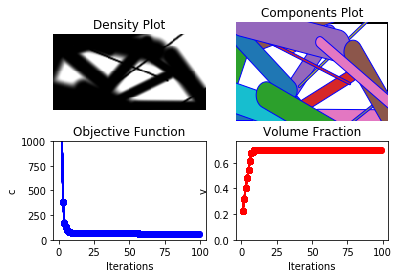

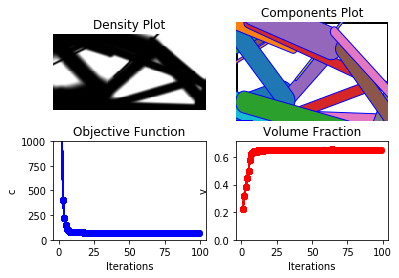

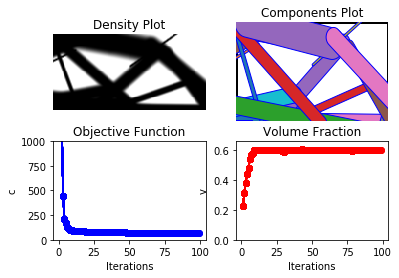

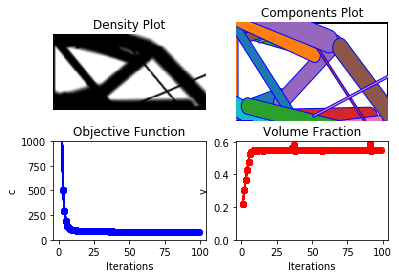

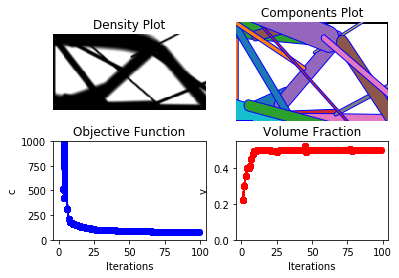

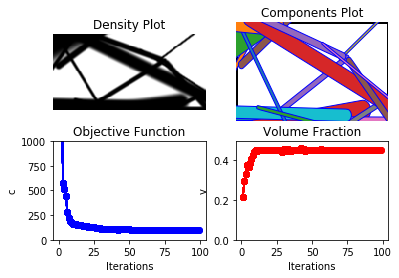

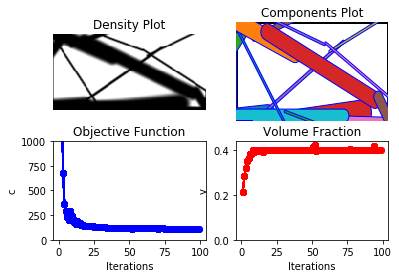

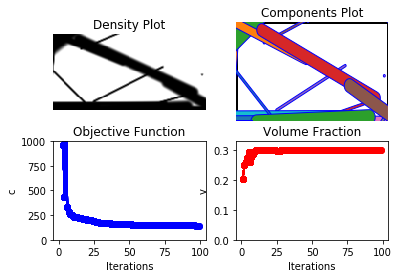

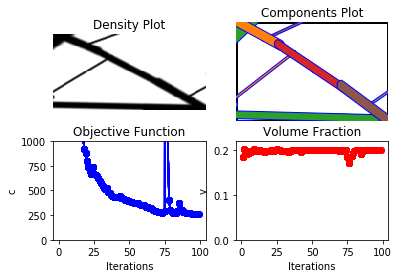

In [8]:
it70, c70, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.70,method,BC,max_iterations)
it65, c65, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.65,method,BC,max_iterations)
it60, c60, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.60,method,BC,max_iterations)
it55, c55, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.55,method,BC,max_iterations)
it50, c50, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.50,method,BC,max_iterations)
it45, c45, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.45,method,BC,max_iterations)
it40, c40, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.40,method,BC,max_iterations)
it35, c35, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.35,method,BC,max_iterations)
it30, c30, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.30,method,BC,max_iterations)
it25, c25, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.25,method,BC,max_iterations)
it20, c20, aa, bb, cc, dd, ee, ff = Topology_optimization.main(nelx,nely,0.20,method,BC,max_iterations)

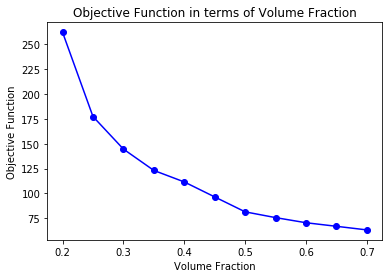

Plot Saved


In [42]:
fig=plt.figure()
plt.title('Objective Function in terms of Volume Fraction')
y_plot = [c20[it20-1],c25[it25-1],c30[it30-1],c35[it35-1],c40[it40-1],c45[it45-1],c50[it50-1],c55[it55-1],c60[it60-1],c65[it65-1],c70[it70-1]]
x_plot = [0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7]
plt.plot(x_plot,y_plot,'b', marker = 'o')
plt.xlabel('Volume Fraction')
plt.ylabel('Objective Function')
plt.show()
fig.savefig('Objective Function in terms of Volume Fraction ' + str(nelx) + ' x '+ str(nely) + ' - ' + str(BC) + ' - ' + str(method) + ' - ' + str(volume_fraction) + '.png')     
print("Plot Saved" )